In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
data=pd.read_csv(r"D:\ML\Project\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [53]:
data.shape

(768, 9)

In [54]:
x=data.iloc[:,:-1]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [55]:
y=data.iloc[:,-1]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/5, random_state = 0)

In [58]:
x_train.shape, y_train.shape

((614, 8), (614,))

In [59]:
x_test.shape,y_test.shape

((154, 8), (154,))

# Linear Regression model

In [13]:
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression(solver="liblinear")

In [19]:
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

# Prediction result

In [21]:
y_predict = model.predict(x_test)
y_predict

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [23]:
print("Coefficients",model.coef_)
print("Intercept",model.intercept_)

Coefficients [[ 0.08776821  0.02674345 -0.01797703  0.00423029 -0.00086076  0.05588564
   0.61751605  0.01118046]]
Intercept [-5.46556447]


In [26]:
model.score(x_train,y_train)

0.7638436482084691

Final Linear regression equation becomes
y=0.08776821*Pregnancies  + 0.02674345*Glucose -0.01797703*BloodPressure ----- +0.01118046*Age

# Metrices: Accuracy, recall, Precision

In [24]:
from sklearn import metrics

In [25]:
metrics.confusion_matrix(y_test, y_predict)

array([[98,  9],
       [19, 28]], dtype=int64)

In [27]:
metrics.accuracy_score(y_test, y_predict)

0.8181818181818182

In [28]:
tn,fp,fn,tp=metrics.confusion_matrix(y_test, y_predict).ravel()

In [29]:
print("True Neg",tn)
print("False Pos",fp)
print("False Neg",fn)
print("True Pos",tp)

True Neg 98
False Pos 9
False Neg 19
True Pos 28


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



# Plot

In [70]:
y_test.size

154

In [71]:
y_predict.size

154

C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome'>

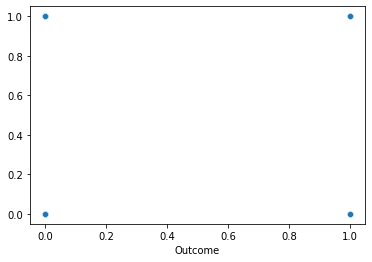

In [75]:
sns.scatterplot(y_test,y_predict)

C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome'>

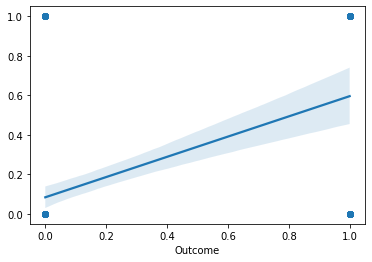

In [64]:
sns.regplot(y_test, y_predict)